In [34]:
# I use interactive python notebooks, so please adjust accordingly
# if you copy and paste any of this code and are running a script instead.
import pandas as pd

df = pd.read_csv("C:\\Users\\ericj\\Documents\\credit_fraud\\creditcard.csv")

# Taking a look at the columns statistical summary.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


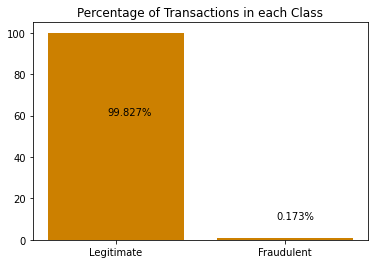

In [35]:
import matplotlib.pyplot as plt

# normalizing the class label counts to set the heights of the bars and the displays
counts = df['Class'].value_counts(normalize=True) * 100
counts[1] = counts[1] + 0.6 # ensuring that the bar for the minority class is actually visible

# creating a bar plot
plt.bar(x = df['Class'].unique(), height = counts, color = (0.8,0.5,0), tick_label = ['Legitimate', 'Fraudulent'])
plt.title(label = 'Percentage of Transactions in each Class')
plt.ylim(0,105) # expanding y-axis upward for better visual aesthetic

# creating and roughly centering the labels
plt.text(x = -0.05, y = 60, s = "{0:5.3f}%".format(counts[0]))
plt.text(x = 0.95, y = 10, s = "{0:4.3f}%".format(counts[1] - 0.6)) # offsetting minority class bar height adjustment for text display
plt.show()

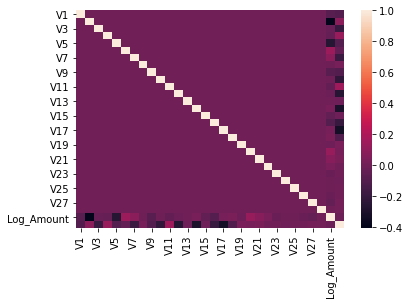

['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18', 'V1', 'V9', 'V5', 'V2', 'V6']


In [36]:
import seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# using a copy of df I started with for correlation analysis
df_for_correlation = df.copy(deep=True)

# The Amount column covers a huge range. Converting to log-space.
eps = 0.001 # 0 => 0.1¢
df_for_correlation['Log_Amount'] = np.log(df_for_correlation.pop('Amount')+eps)

# splitting data into features and labels
y_all = df_for_correlation['Class']
X_all = df_for_correlation.drop(columns= ['Time', 'Class'])

# normalizing feature data to perform correlation analysis with Class labels
# recall columns V1 - V28 were created  by PCA and so are already normalized
# the only column that is not already normalized is the Log_Amount column 
# "renormalizing" the other columns will have no significant effect
scaler = StandardScaler()
X_np  = scaler.fit_transform(X_all)
# easier to run and plot correlation analysis from pandas
df_transformed = pd.DataFrame(data = X_np, columns = X_all.columns) 
# adding Class label back to dataset
df_transformed['Class'] = y_all

# creating the Pearson correlation matrix.
corr_matrix = df_transformed.corr()
corr_series = corr_matrix['Class'].abs().sort_values(ascending=False)
seaborn.heatmap(corr_matrix)
plt.show()

# Taking the 14 features that are most highly correlated with class
# The Class variable is included in this list at index 0! 
# Note we are not going to use Class to predict... Class
important_features = corr_series[1:16].index.tolist()
print(important_features)

In [37]:
from collections import Counter
from sklearn.model_selection import train_test_split

import numpy as np
import imblearn

y = df['Class']
X = df.drop(columns = ['Class', 'Time'])

seed = 7
test_size = 0.3

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

# I obtained the important features list by ordering the absolute values.
# of a correlation analysis creating a list.
# I have provided a hard-coded version of that list here.
# important_features = ['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18', 'V1', 'V9', 'V5', 'V2', 'V6']

X_train = np.array(X_train[important_features])
X_test = np.array(X_test[important_features])

# basic shape inspections
print('Training labels shape:', y_train.shape)
print('Test labels shape:', y_test.shape)
print('Training features shape:', X_train.shape)
print('Test features shape:', X_test.shape)

# creating imblearn resampling object
# sampling strategy is the propotion of output
# resampled data that is the minority class
over_and_under_sample =  imblearn.combine.SMOTETomek(sampling_strategy = 1.0, n_jobs = -1, random_state = seed)
X_train, y_train = over_and_under_sample.fit_resample(X_train, y_train)

# checking under- and over-sample counts
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print(counter_train, counter_test)

Training labels shape: (199364,)
Test labels shape: (85443,)
Training features shape: (199364, 15)
Test features shape: (85443, 15)
Counter({0: 199027, 1: 199027}) Counter({0: 85288, 1: 155})


In [38]:
# from xgboost import XGBClassifier

# # declaring an out-of-box-XGBoost classifier
# model = XGBClassifier()
# print(model)

In [39]:
from xgboost import XGBClassifier

# declaring an XGBoost classifier
model = XGBClassifier(learning_rate = 0.01, n_estimators = 600, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss', base_score = 0.95, gamma = 1.55, reg_lambda = 9, random_state = seed)
print(model)

XGBClassifier(base_score=0.95, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              eval_metric='logloss', gamma=1.55, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, num_parallel_tree=None,
              random_state=7, reg_alpha=None, reg_lambda=9,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [40]:
# Fitting the model
model.fit(X_train, y_train)

C:\Users\ericj\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.95, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1.55, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=16,
              num_parallel_tree=1, random_state=7, reg_alpha=0, reg_lambda=9,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [41]:
from sklearn import metrics

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate our predictions
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100)
print(confusion_matrix)

recall = metrics.recall_score(y_test, predictions)
print("Recall: %.2f%%" % (recall * 100))

accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100))

precision = metrics.precision_score(y_test, predictions)
print("precision: %.2f%%" % (precision * 100))

C:\Users\ericj\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
[[84356   932]
 [   12   143]]
Recall: 92.26%
Accuracy: 98.90%
precision: 13.30%


In [42]:
from sklearn.metrics import classification_report
target_names = ['Legal', 'Fraud']

print(classification_report(y_true = y_test, y_pred = predictions, target_names = target_names, 
digits = 3))

# evaluate the predictions
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100)
print(confusion_matrix, "\n \n", "Recall: %.2f%%" % (recall * 100), "\n", "Accuracy: %.2f%%" % (accuracy * 100),
"\n", "precision: %.2f%%" % (precision * 100))

              precision    recall  f1-score   support

       Legal      1.000     0.989     0.994     85288
       Fraud      0.133     0.923     0.233       155

    accuracy                          0.989     85443
   macro avg      0.566     0.956     0.613     85443
weighted avg      0.998     0.989     0.993     85443

[[84356   932]
 [   12   143]] 
 
 Recall: 92.26% 
 Accuracy: 98.90% 
 precision: 13.30%
